In [291]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from matplotlib import rc
# rc('axes', unicode_minus=False)
# rc('font', family='Malgun Gothic')


In [292]:
# 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum

fe = fm.FontEntry(
    fname=r'C:\Users\LG\Documents\my_moviedata\font\TENADA_font\Tenada.ttf', # ttf 파일이 저장되어 있는 경로
    name='Tenada.ttf')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 15, 'font.family': 'Tenada.ttf'}) # 폰트 설정


'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


## 파일 전처리

In [293]:
# 파일 불러오기
result = pd.read_csv('./result.csv', index_col=0)
result.head()

,영화명,분석월,점유율,누적매출액,관객수,누적관객수,스크린수,개봉날짜,국적,배급사,관람등급,상영시간,주제,선정성,폭력성,대사,공포,약물,모방위험,장르
0,신과함께-인과 연,202101,9677190.0,1.026874e+11,1364.0,12277723.0,86.0,2018-08-01,한국,롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,141분 20초,12세이상관람가,전체관람가,12세이상관람가,12세이상관람가,12세이상관람가,전체관람가,전체관람가,판타지
1,신과함께-인과 연,202102,490940.0,1.026879e+11,78.0,12277801.0,25.0,2018-08-01,한국,롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,141분 20초,12세이상관람가,전체관람가,12세이상관람가,12세이상관람가,12세이상관람가,전체관람가,전체관람가,판타지
2,라라랜드,202101,81359900.0,3.095449e+10,11526.0,3753565.0,78.0,2016-12-07,미국,판씨네마(주),12세이상관람가,127분 53초,12세이상관람가,12세이상관람가,전체관람가,전체관람가,전체관람가,12세이상관람가,전체관람가,드라마
3,라라랜드,202102,1588000.0,3.095608e+10,189.0,3753754.0,10.0,2016-12-07,미국,판씨네마(주),12세이상관람가,127분 53초,12세이상관람가,12세이상관람가,전체관람가,전체관람가,전체관람가,12세이상관람가,전체관람가,드라마
4,라라랜드,202103,200000.0,3.095628e+10,20.0,3753774.0,1.0,2016-12-07,미국,판씨네마(주),12세이상관람가,127분 53초,12세이상관람가,12세이상관람가,전체관람가,전체관람가,전체관람가,12세이상관람가,전체관람가,드라마


In [294]:
# 평균 누적매출액 구하기 위한 중복값 제거
resultD = result.drop_duplicates('영화명', keep='last').reset_index(drop=True)
resultD

,영화명,분석월,점유율,누적매출액,관객수,누적관객수,스크린수,개봉날짜,국적,배급사,관람등급,상영시간,주제,선정성,폭력성,대사,공포,약물,모방위험,장르
0,신과함께-인과 연,202102,490940.0,1.026879e+11,78.0,12277801.0,25.0,2018-08-01,한국,롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,141분 20초,12세이상관람가,전체관람가,12세이상관람가,12세이상관람가,12세이상관람가,전체관람가,전체관람가,판타지
1,라라랜드,202106,350000.0,3.097106e+10,51.0,3755872.0,14.0,2016-12-07,미국,판씨네마(주),12세이상관람가,127분 53초,12세이상관람가,12세이상관람가,전체관람가,전체관람가,전체관람가,12세이상관람가,전체관람가,드라마
2,신과함께-죄와 벌,202101,19855450.0,1.157275e+11,2876.0,14414658.0,109.0,2017-12-20,한국,롯데쇼핑㈜롯데엔터테인먼트,12세이상관람가,139분 32초,12세이상관람가,전체관람가,12세이상관람가,12세이상관람가,12세이상관람가,12세이상관람가,12세이상관람가,판타지
3,택시운전사,202105,240000.0,9.587155e+10,40.0,12189698.0,1.0,2017-08-02,한국,(주)쇼박스,15세이상관람가,137분 0초,15세이상관람가,전체관람가,15세이상관람가,15세이상관람가,15세이상관람가,12세이상관람가,15세이상관람가,드라마
4,테넷,202106,6455000.0,1.848153e+10,920.0,2001171.0,30.0,2020-08-26,미국,워너브러더스 코리아(주),12세이상관람가,149분 59초,12세이상관람가,전체관람가,12세이상관람가,12세이상관람가,12세이상관람가,12세이상관람가,전체관람가,액션
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,특공여전사,202212,50000.0,5.000000e+04,10.0,10.0,1.0,2022-12-26,중국,초코필름,15세이상관람가,99분 45초,12세이상관람가,전체관람가,15세이상관람가,전체관람가,15세이상관람가,12세이상관람가,12세이상관람가,액션
773,단청낭자,202212,50000.0,5.000000e+04,10.0,10.0,1.0,2022-12-26,중국,초코필름,15세이상관람가,67분 46초,전체관람가,전체관람가,15세이상관람가,전체관람가,12세이상관람가,12세이상관람가,12세이상관람가,판타지
774,요로나: 끝나지 않은 저주,202212,6000.0,6.000000e+03,1.0,1.0,1.0,2022-12-28,캐나다,(주)누리픽쳐스,15세이상관람가,98분 35초,12세이상관람가,전체관람가,12세이상관람가,전체관람가,15세이상관람가,전체관람가,전체관람가,공포(호러)
775,시간을 꿈꾸는 소녀,202212,0.0,0.000000e+00,0.0,0.0,1.0,2023-01-11,한국,"(주)하이하버픽쳐스,(주)영화사 진진",12세이상관람가,110분 26초,12세이상관람가,전체관람가,전체관람가,12세이상관람가,12세이상관람가,전체관람가,전체관람가,다큐멘터리


In [295]:
# 2021 ~ 2022년 관람등급에 따른 평균 누적매출액
money_mean = resultD[['누적매출액', '관람등급']].groupby(['관람등급']).mean(numeric_only=True).reset_index()
money_mean

,관람등급,누적매출액
0,12세이상관람가,4.707354e+09
1,15세이상관람가,3.195833e+09
2,전체관람가,1.047985e+09
3,청소년관람불가,1.360997e+09


In [296]:
# 함수 정리하기
def drawGraph():
    plt.figure(figsize=(10, 5))
    sns.set(style='darkgrid', font='Tenada.ttf', palette=['#FFFF00','#FF8C00','#006400','#8B0000'])

Text(0.5, 1.0, '관람등급별 평균 누적매출액')

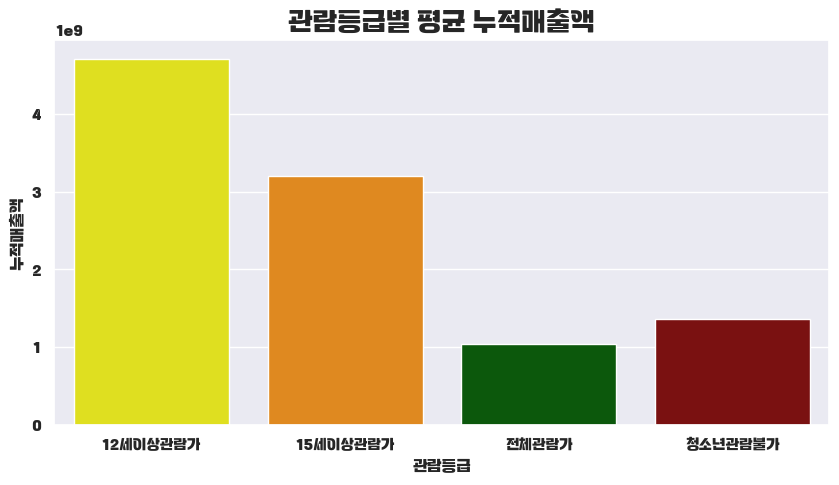

In [297]:
# 2021 ~ 2022년 관람등급별 평균 누적매출액
drawGraph()
sns.barplot(money_mean, x='관람등급', y='누적매출액')
plt.title('관람등급별 평균 누적매출액', size=20)

In [298]:
# 2021 ~ 2022년 관람등급에 따른 관객수 총합
_count = result[['관객수', '관람등급']].groupby(['관람등급']).sum(numeric_only=True).reset_index()
_count

,관람등급,관객수
0,12세이상관람가,54195302.0
1,15세이상관람가,32219684.0
2,전체관람가,11453718.0
3,청소년관람불가,3988674.0


Text(0.5, 1.0, '관람등급별 관객수 총합')

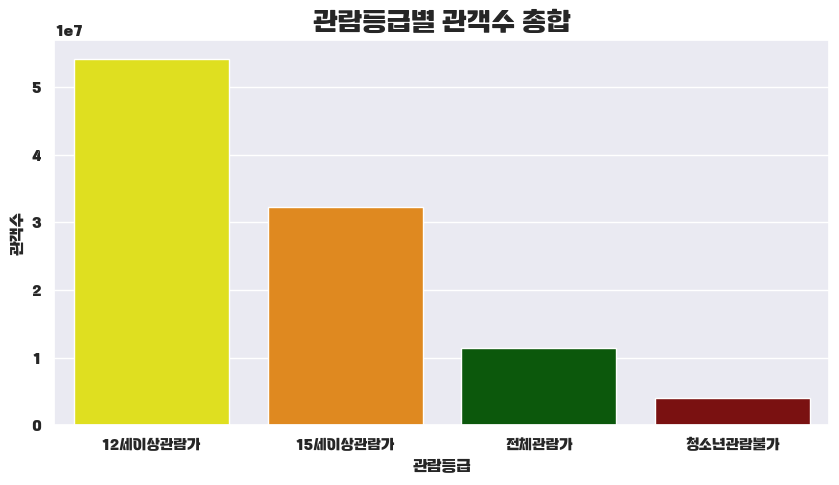

In [299]:
# 2021 ~ 2022년 관람등급별 관객수 총합
drawGraph()
sns.barplot(_count, x='관람등급', y='관객수')
plt.title('관람등급별 관객수 총합', size=20)


#### 2021 ~ 2022년 종합 누적매출액은 12세이상관람가 > 15세이상관람가 > 청소년관람불가 > 전체관람가 순이지만, <br> 2021 ~ 2022년 종합 총 관객수는 12세이상관람가 > 15세이상관람가 > 전체관람가 > 청소년관람불가 순이다. <br> 매출액은 OTT 포함이라서 청소년관람불가 순위가 높은 것이라 예상된다. <br><br> => 총 관객수보다 누적매출액으로 분석하는 것이 적절하다고 판단됨

---

In [300]:
# <범죄> 장르에 대한 데이터 추출
crimeR = result[result['장르']=='범죄']
crimeR.head()


,영화명,분석월,점유율,누적매출액,관객수,누적관객수,스크린수,개봉날짜,국적,배급사,관람등급,상영시간,주제,선정성,폭력성,대사,공포,약물,모방위험,장르
24,독전,202104,793000.0,4.348762e+10,140.0,5063984.0,4.0,2018-05-22,한국,(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,123분 20초,15세이상관람가,15세이상관람가,15세이상관람가,15세이상관람가,15세이상관람가,15세이상관람가,15세이상관람가,범죄
25,독전,202105,3966000.0,4.349159e+10,308.0,5064292.0,3.0,2018-05-22,한국,(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,123분 20초,15세이상관람가,15세이상관람가,15세이상관람가,15세이상관람가,15세이상관람가,15세이상관람가,15세이상관람가,범죄
37,블랙머니,202103,320000.0,2.087173e+10,40.0,2480185.0,1.0,2019-11-13,한국,(주)에이스메이커무비웍스,12세이상관람가,113분 20초,12세이상관람가,전체관람가,12세이상관람가,12세이상관람가,12세이상관람가,12세이상관람가,12세이상관람가,범죄
38,블랙머니,202104,576000.0,2.087231e+10,72.0,2480257.0,1.0,2019-11-13,한국,(주)에이스메이커무비웍스,12세이상관람가,113분 20초,12세이상관람가,전체관람가,12세이상관람가,12세이상관람가,12세이상관람가,12세이상관람가,12세이상관람가,범죄
54,도굴,202101,196004260.0,1.396068e+10,21729.0,1545243.0,294.0,2020-11-04,한국,(주)씨제이이엔엠,12세이상관람가,114분 50초,12세이상관람가,12세이상관람가,12세이상관람가,12세이상관람가,12세이상관람가,12세이상관람가,12세이상관람가,범죄


In [301]:
# <범죄> 장르에 대한 평균 누적매출액을 구하기 위해 중복값 제거
crimeRD = crimeR.drop_duplicates('영화명', keep='last').reset_index(drop=True)
crimeRD.head()

,영화명,분석월,점유율,누적매출액,관객수,누적관객수,스크린수,개봉날짜,국적,배급사,관람등급,상영시간,주제,선정성,폭력성,대사,공포,약물,모방위험,장르
0,독전,202105,3966000.0,4.349159e+10,308.0,5064292.0,3.0,2018-05-22,한국,(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,123분 20초,15세이상관람가,15세이상관람가,15세이상관람가,15세이상관람가,15세이상관람가,15세이상관람가,15세이상관람가,범죄
1,블랙머니,202104,576000.0,2.087231e+10,72.0,2480257.0,1.0,2019-11-13,한국,(주)에이스메이커무비웍스,12세이상관람가,113분 20초,12세이상관람가,전체관람가,12세이상관람가,12세이상관람가,12세이상관람가,12세이상관람가,12세이상관람가,범죄
2,도굴,202102,305000.0,1.396099e+10,38.0,1545281.0,3.0,2020-11-04,한국,(주)씨제이이엔엠,12세이상관람가,114분 50초,12세이상관람가,12세이상관람가,12세이상관람가,12세이상관람가,12세이상관람가,12세이상관람가,12세이상관람가,범죄
3,협상,202101,320000.0,1.703245e+10,29.0,1967750.0,1.0,2018-09-19,한국,(주)씨제이이엔엠,15세이상관람가,114분 0초,15세이상관람가,전체관람가,15세이상관람가,15세이상관람가,12세이상관람가,12세이상관람가,15세이상관람가,범죄
4,내가 죽기를 바라는 자들,202106,12000.0,5.110724e+08,2.0,54951.0,1.0,2021-05-05,미국,워너브러더스 코리아(주),15세이상관람가,99분 33초,15세이상관람가,전체관람가,15세이상관람가,15세이상관람가,15세이상관람가,12세이상관람가,12세이상관람가,범죄


       관람등급         누적매출액
0  12세이상관람가  0.000000e+00
1  15세이상관람가  1.703245e+10
2     전체관람가  0.000000e+00
3   청소년관람불가  0.000000e+00


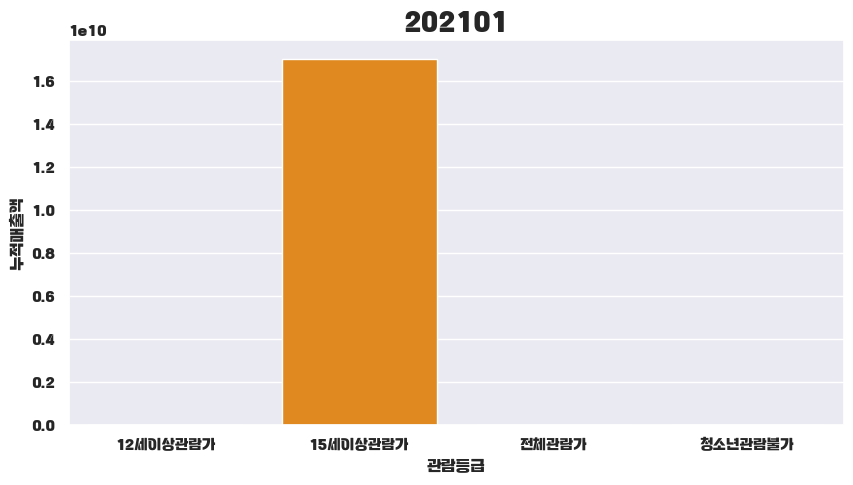

       관람등급         누적매출액
0  12세이상관람가  1.396099e+10
1  15세이상관람가  0.000000e+00
2     전체관람가  0.000000e+00
3   청소년관람불가  0.000000e+00


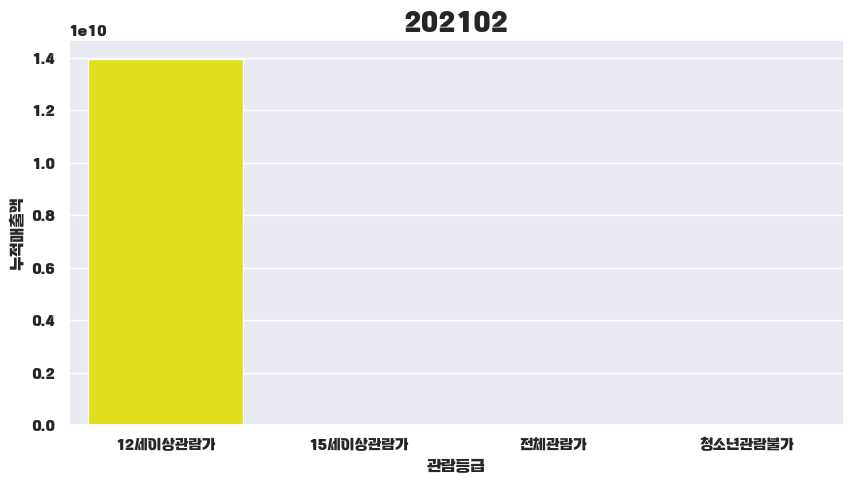

       관람등급         누적매출액
0  12세이상관람가  2.087173e+10
1  15세이상관람가  0.000000e+00
2     전체관람가  0.000000e+00
3   청소년관람불가  0.000000e+00


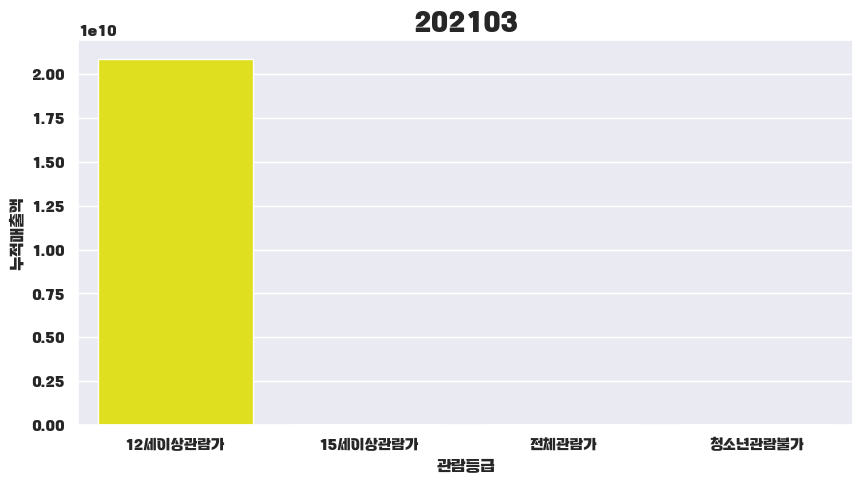

       관람등급         누적매출액
0  12세이상관람가  0.000000e+00
1  15세이상관람가  4.348762e+10
2     전체관람가  0.000000e+00
3   청소년관람불가  0.000000e+00


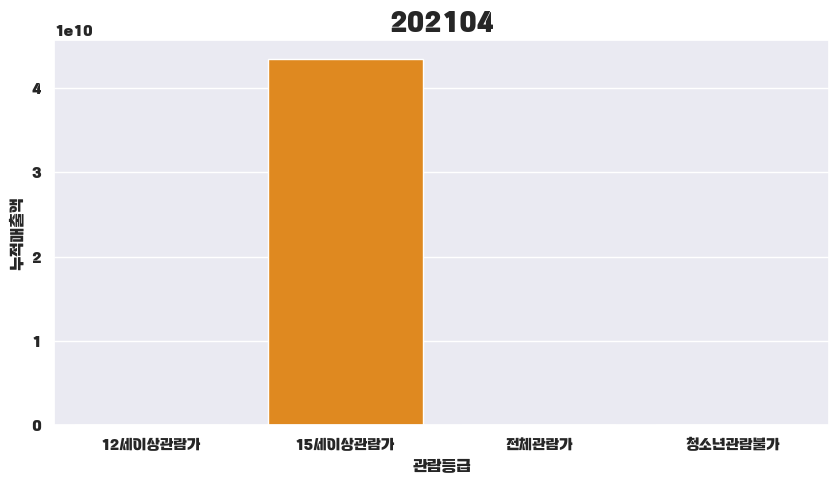

       관람등급         누적매출액
0  12세이상관람가  0.000000e+00
1  15세이상관람가  1.126784e+10
2     전체관람가  0.000000e+00
3   청소년관람불가  0.000000e+00


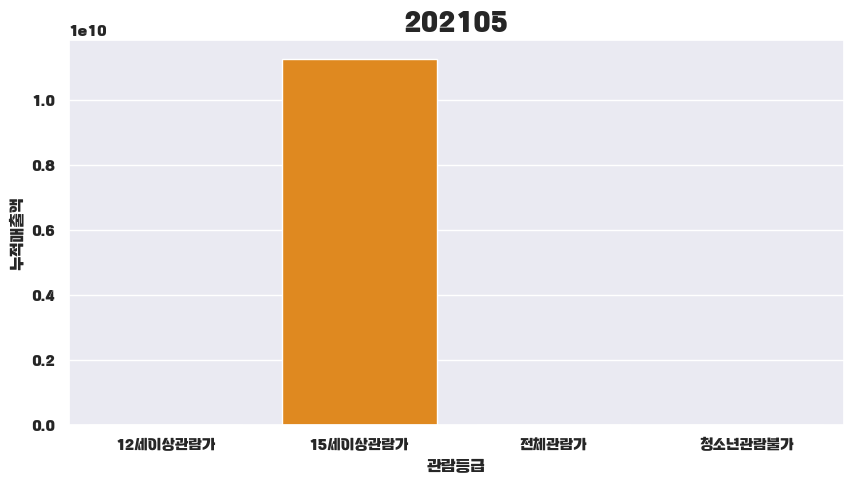

       관람등급        누적매출액
0  12세이상관람가          0.0
1  15세이상관람가  854798400.0
2     전체관람가          0.0
3   청소년관람불가          0.0


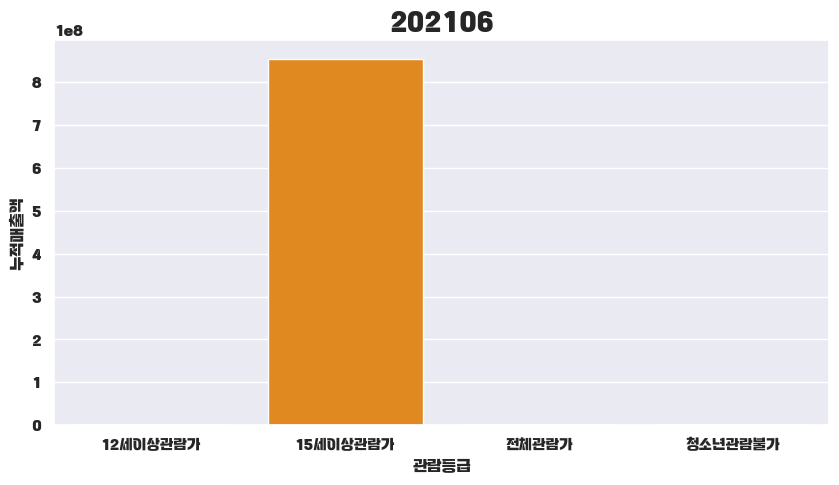

       관람등급         누적매출액
0  12세이상관람가  0.000000e+00
1  15세이상관람가  5.344140e+09
2     전체관람가  0.000000e+00
3   청소년관람불가  0.000000e+00


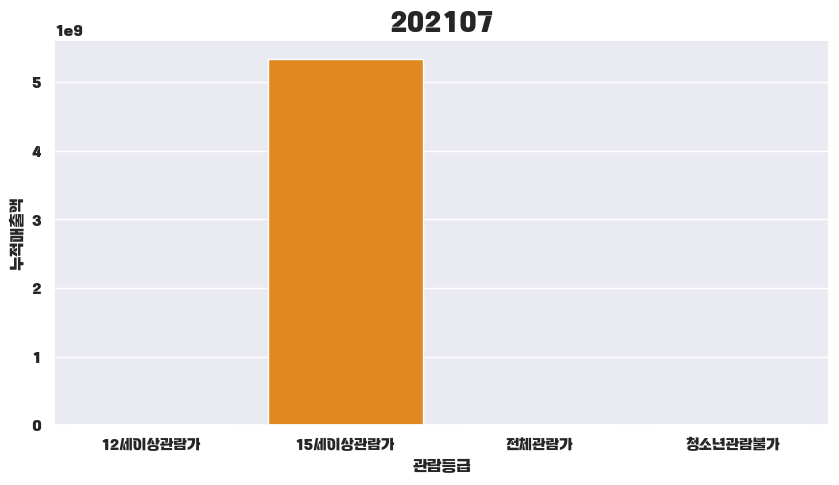

       관람등급       누적매출액
0  12세이상관람가         0.0
1  15세이상관람가  16074035.0
2     전체관람가         0.0
3   청소년관람불가         0.0


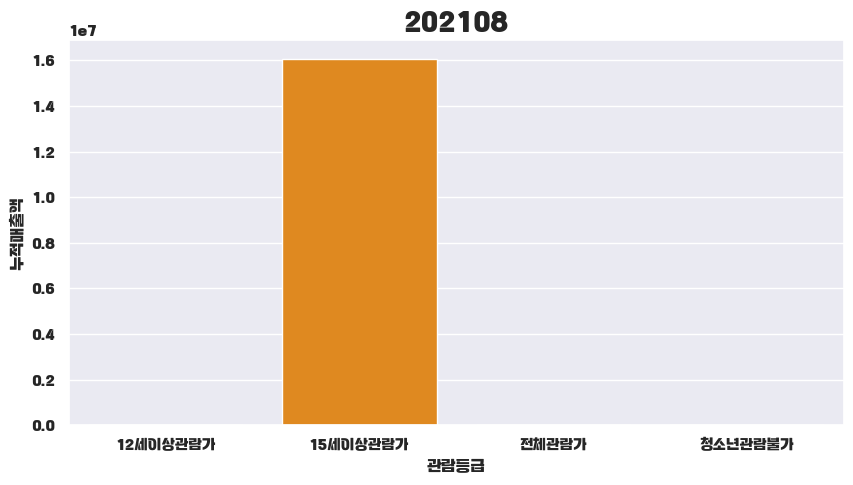

       관람등급         누적매출액
0  12세이상관람가  0.000000e+00
1  15세이상관람가  1.216420e+09
2     전체관람가  0.000000e+00
3   청소년관람불가  0.000000e+00


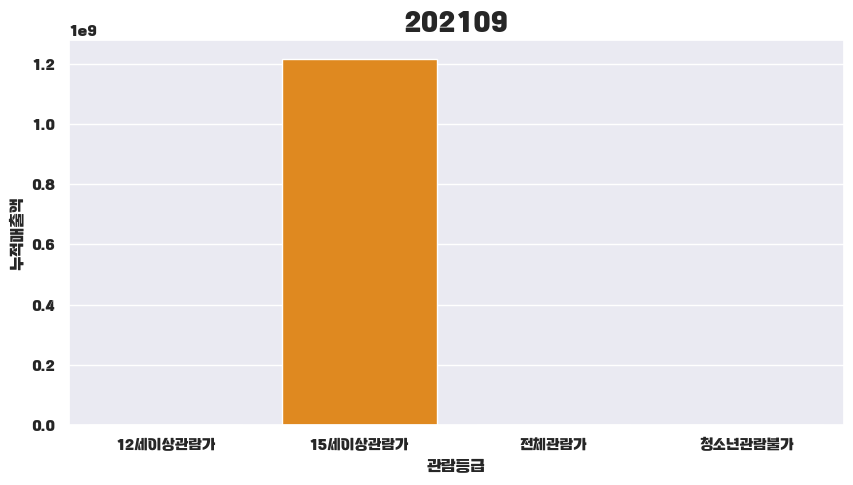

       관람등급       누적매출액
0  12세이상관람가         0.0
1  15세이상관람가  23588070.0
2     전체관람가         0.0
3   청소년관람불가         0.0


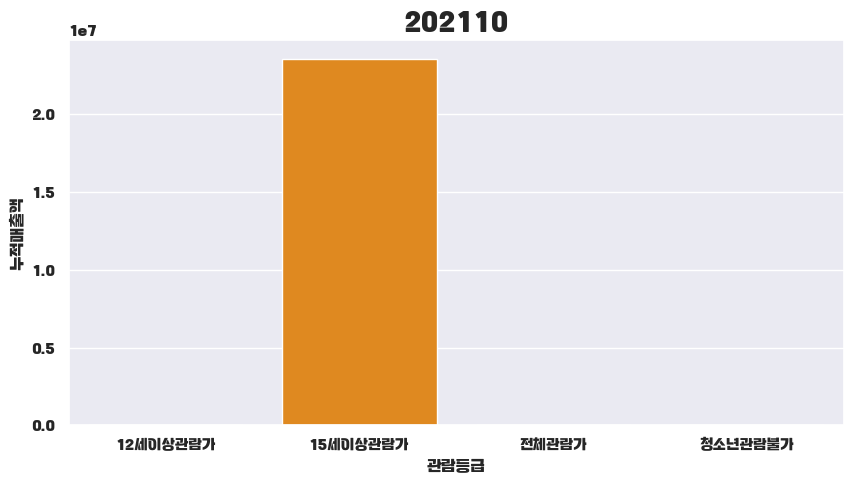

       관람등급  누적매출액
0  12세이상관람가    0.0
1  15세이상관람가    0.0
2     전체관람가    0.0
3   청소년관람불가    0.0


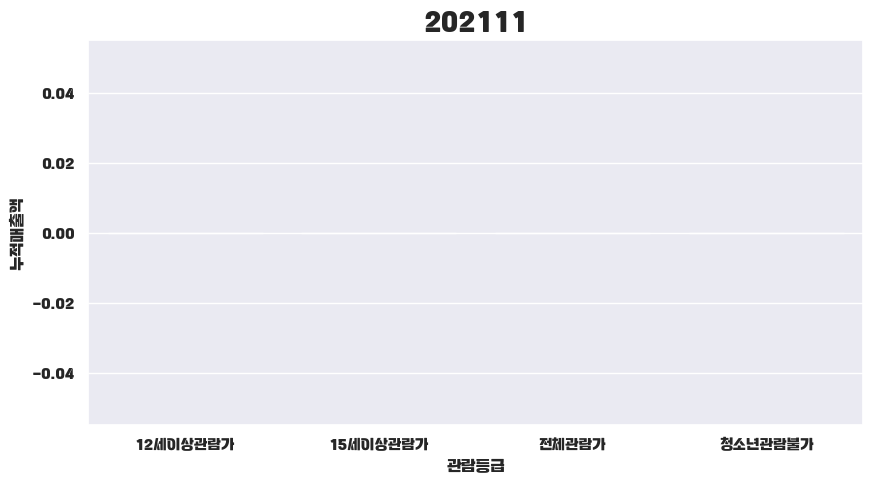

       관람등급  누적매출액
0  12세이상관람가    0.0
1  15세이상관람가    0.0
2     전체관람가    0.0
3   청소년관람불가    0.0


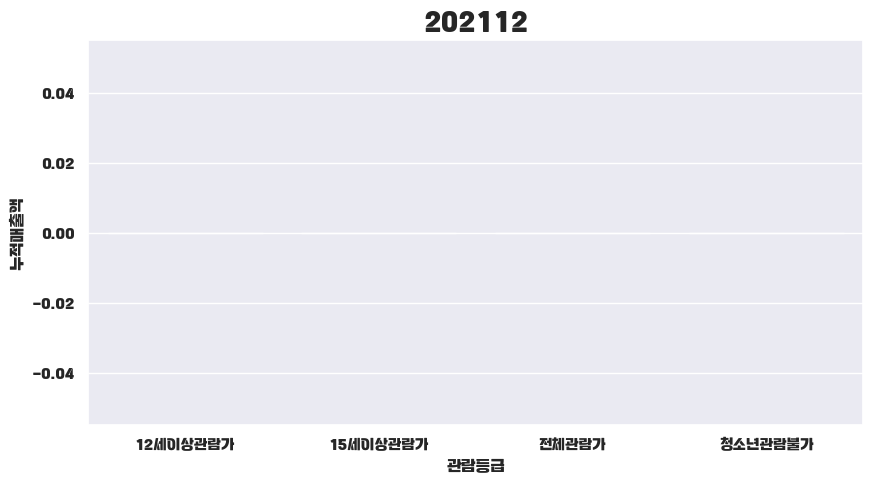

In [302]:
# 2021년 <범죄> 장르에 대한 월별 관람등급에 따른 누적매출액
year_month = result['분석월'].unique().tolist()
year_month.sort()


db=None
for i in range(12):
    mask = crimeR['분석월'] == year_month[i]
    mr = crimeR.loc[mask]
    p5 = mr[['관람등급', '누적매출액']].groupby('관람등급').mean()
    p = p5[(p5["누적매출액"] >= p5["누적매출액"].mean())].reset_index()

    ps =p[0:0].copy()
    ps.loc[0]=["12세이상관람가",0]
    ps.loc[1]=["15세이상관람가",0]
    ps.loc[2]=["전체관람가",0]
    ps.loc[3]=["청소년관람불가",0]
    
    db = pd.merge(left=ps, right=p, how="left", on = "관람등급").drop(["누적매출액_x"], axis=1).fillna(0).rename(columns={"누적매출액_y":"누적매출액"})
    print(db)

    fig=plt.figure(figsize=(10, 5))
    ax1=fig.add_subplot(1,1,1)
    sns.barplot(x='관람등급', y='누적매출액', data=db)
    ax1.set_title(year_month[i], size=20)
    plt.show()



In [303]:
cc = crimeRD.copy()
cc["분석년"] = cc["분석월"].astype('string').str[:4]
cc = cc[['분석년', '관람등급', '누적매출액']].groupby(['분석년', '관람등급']).mean(numeric_only=True).reset_index()
cc2021 = cc[cc['분석년'] == '2021']
_cc2021 = cc2021.copy()
_cc2021.loc[3] = [2021, '전체관람가', 0]
_cc2021 = _cc2021.set_index('관람등급')
_cc2021 = _cc2021.reindex(['12세이상관람가', '15세이상관람가', '전체관람가', '청소년관람불가']).reset_index()
_cc2021


,관람등급,분석년,누적매출액
0,12세이상관람가,2021,1.741665e+10
1,15세이상관람가,2021,1.033222e+10
2,전체관람가,2021,0.000000e+00
3,청소년관람불가,2021,2.204090e+06


Text(0.5, 1.0, '2021년 관람등급별 평균 누적매출액')

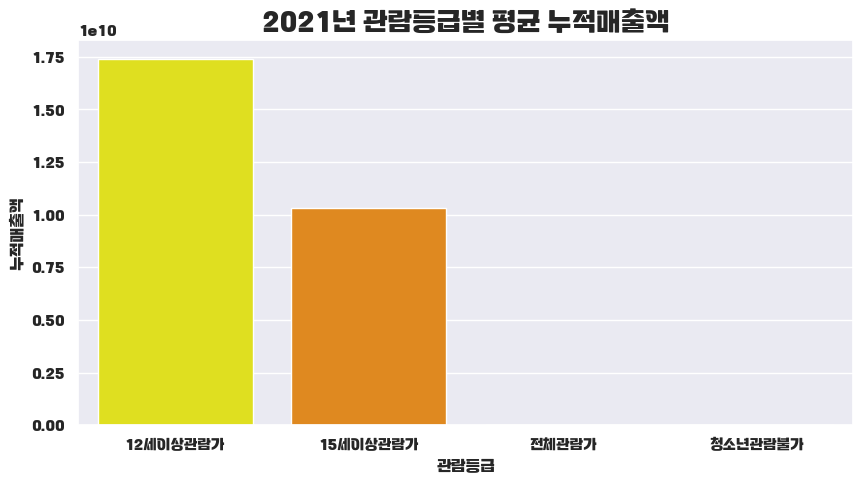

In [304]:
# 2021년 <범죄> 장르에 대한 월별 관람등급에 따른 누적매출액에 대한 평균
drawGraph()
sns.barplot(_cc2021, x='관람등급', y='누적매출액')
plt.title('2021년 관람등급별 평균 누적매출액', size=20)

---

       관람등급         누적매출액
0  12세이상관람가  0.000000e+00
1  15세이상관람가  5.776686e+09
2     전체관람가  0.000000e+00
3   청소년관람불가  0.000000e+00


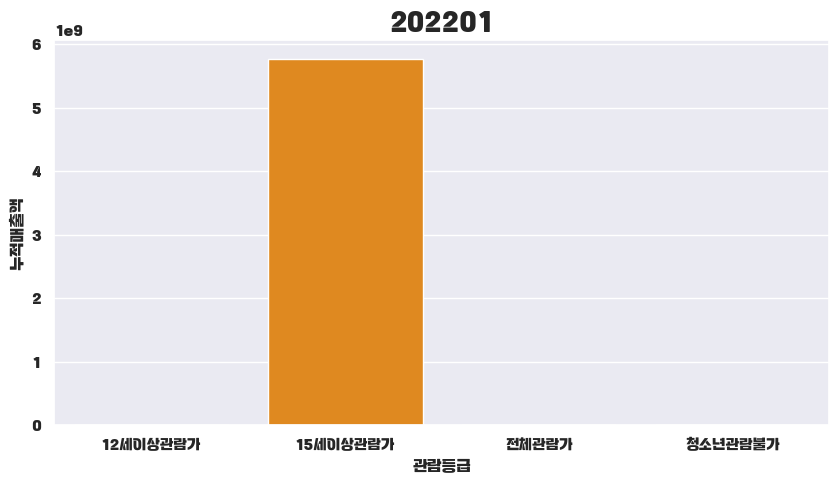

       관람등급         누적매출액
0  12세이상관람가  0.000000e+00
1  15세이상관람가  0.000000e+00
2     전체관람가  0.000000e+00
3   청소년관람불가  5.972672e+09


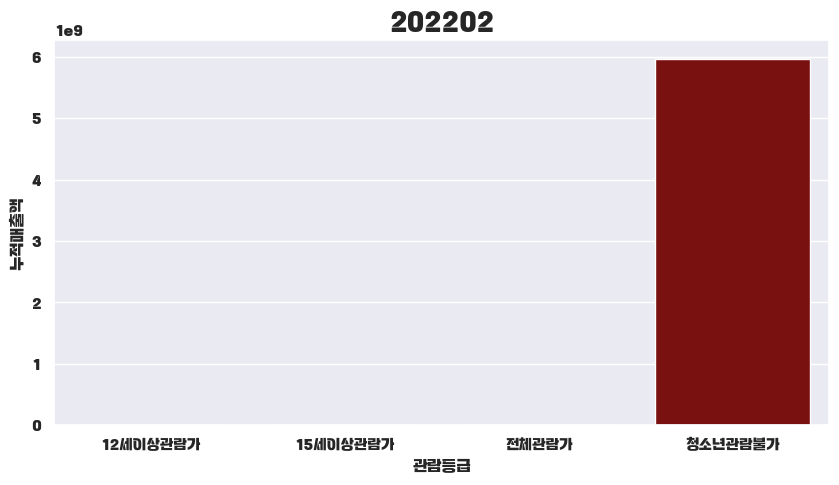

       관람등급         누적매출액
0  12세이상관람가  0.000000e+00
1  15세이상관람가  1.415371e+09
2     전체관람가  0.000000e+00
3   청소년관람불가  0.000000e+00


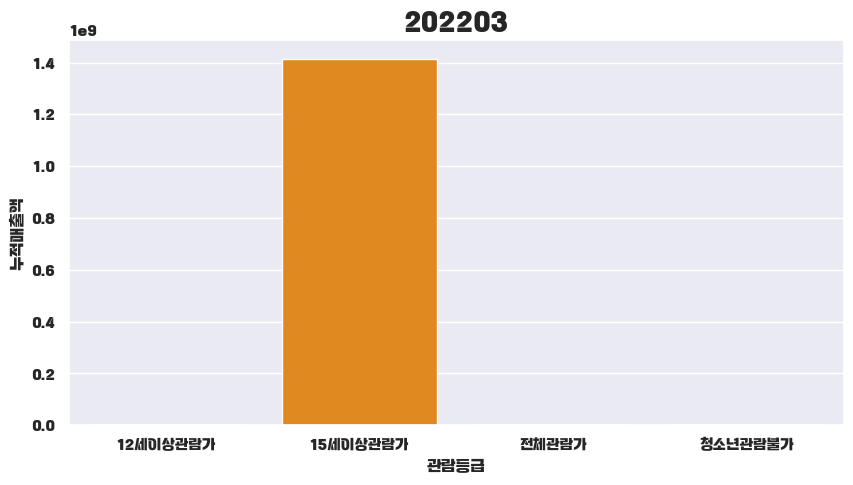

       관람등급  누적매출액
0  12세이상관람가    0.0
1  15세이상관람가    0.0
2     전체관람가    0.0
3   청소년관람불가    0.0


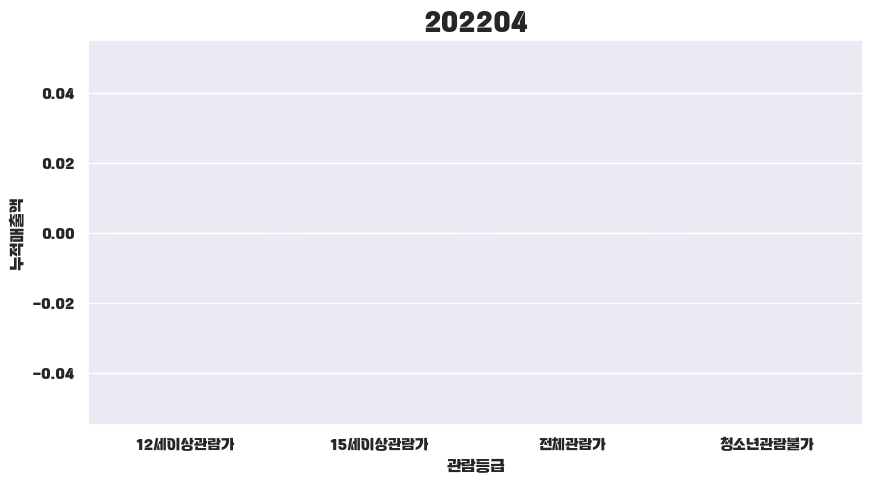

       관람등급         누적매출액
0  12세이상관람가  0.000000e+00
1  15세이상관람가  0.000000e+00
2     전체관람가  0.000000e+00
3   청소년관람불가  7.768462e+09


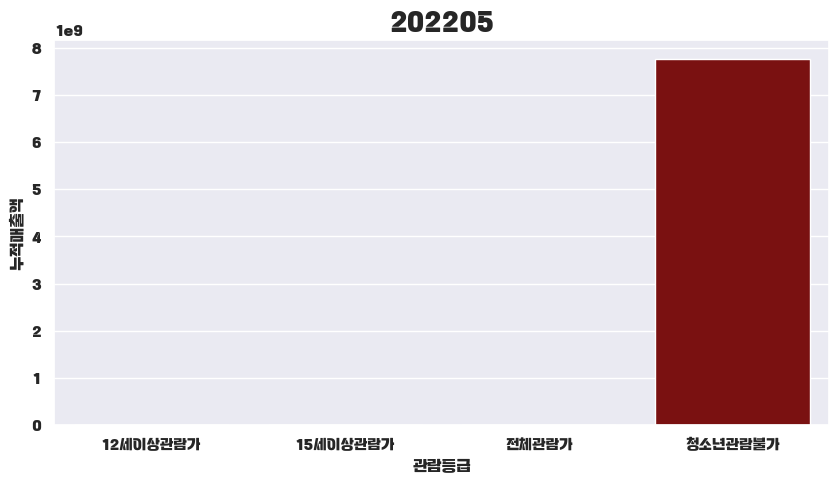

       관람등급  누적매출액
0  12세이상관람가    0.0
1  15세이상관람가    0.0
2     전체관람가    0.0
3   청소년관람불가    0.0


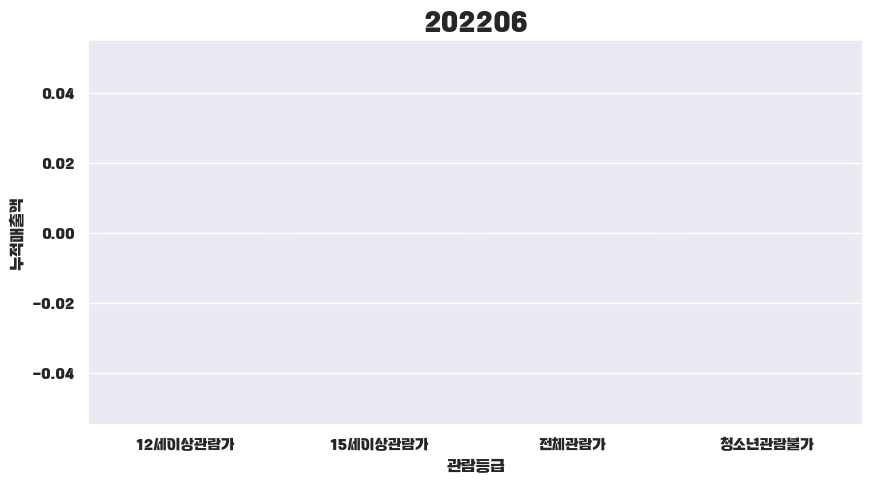

       관람등급         누적매출액
0  12세이상관람가  0.000000e+00
1  15세이상관람가  3.283375e+10
2     전체관람가  0.000000e+00
3   청소년관람불가  0.000000e+00


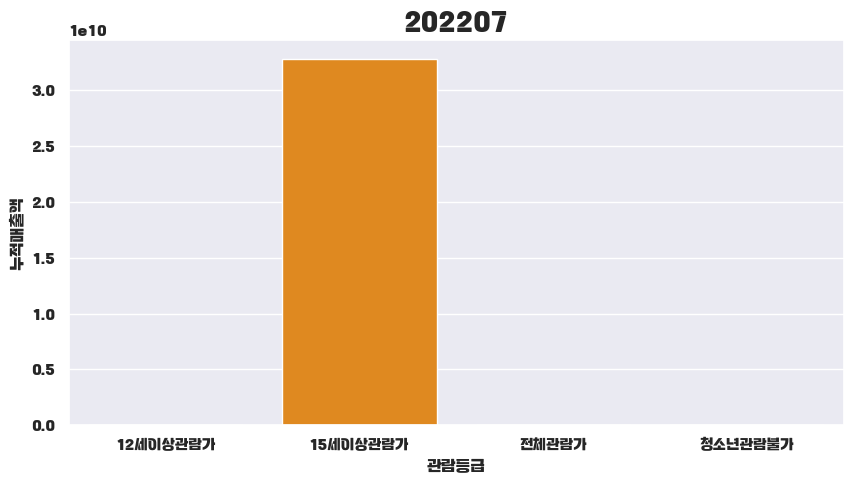

       관람등급         누적매출액
0  12세이상관람가  0.000000e+00
1  15세이상관람가  2.631018e+10
2     전체관람가  0.000000e+00
3   청소년관람불가  0.000000e+00


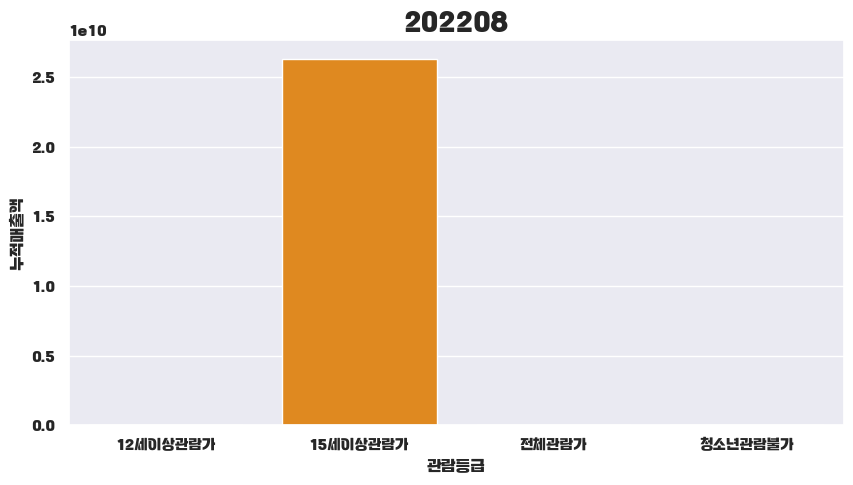

       관람등급         누적매출액
0  12세이상관람가  0.000000e+00
1  15세이상관람가  6.595621e+10
2     전체관람가  0.000000e+00
3   청소년관람불가  0.000000e+00


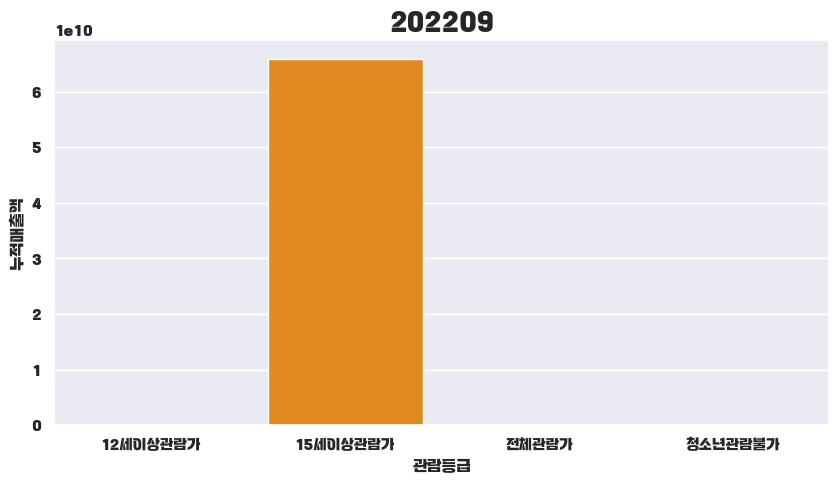

       관람등급         누적매출액
0  12세이상관람가  0.000000e+00
1  15세이상관람가  6.595835e+10
2     전체관람가  0.000000e+00
3   청소년관람불가  0.000000e+00


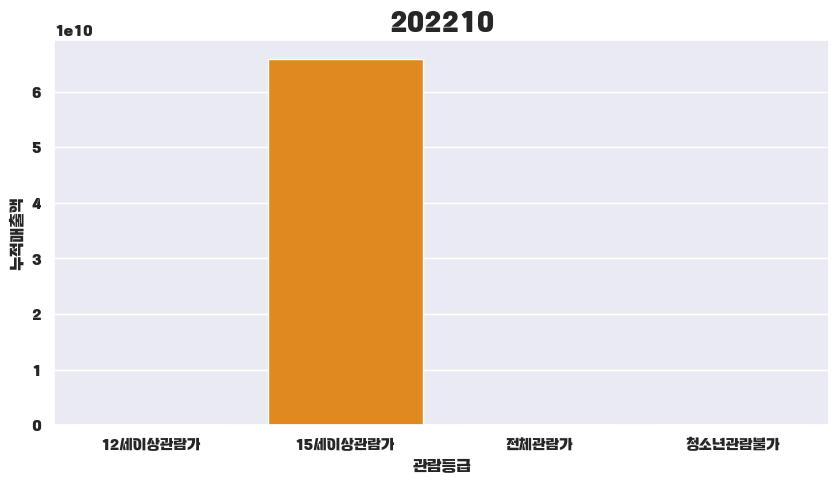

       관람등급        누적매출액
0  12세이상관람가          0.0
1  15세이상관람가  386174151.0
2     전체관람가          0.0
3   청소년관람불가          0.0


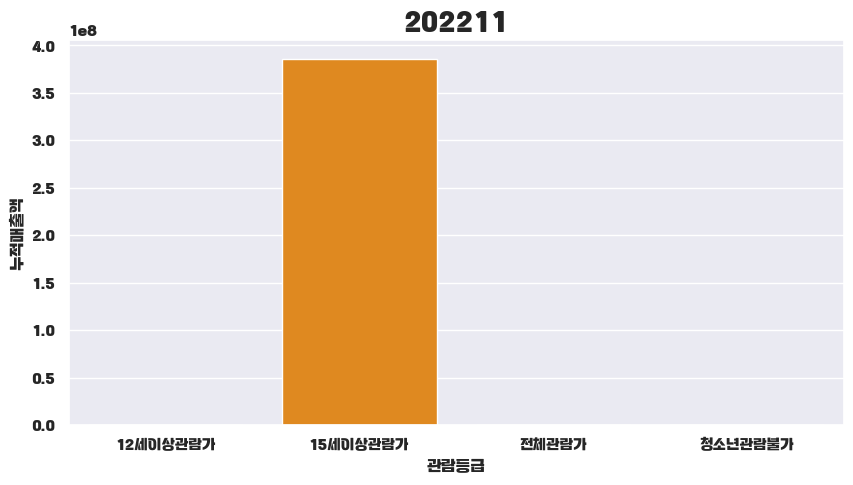

       관람등급        누적매출액
0  12세이상관람가          0.0
1  15세이상관람가  787785077.5
2     전체관람가          0.0
3   청소년관람불가          0.0


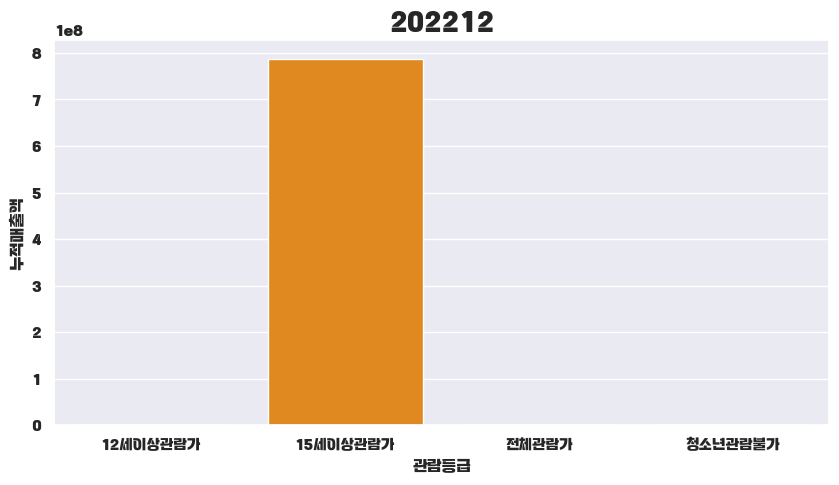

In [305]:
# 2022년 <범죄> 장르에 대한 월별 관람등급에 따른 누적매출액
db=None
for i in range(12, 24):
    mask = crimeR['분석월'] == year_month[i]
    mr = crimeR.loc[mask]
    p5 = mr[['관람등급', '누적매출액']].groupby('관람등급').mean()
    p = p5[(p5["누적매출액"] >= p5["누적매출액"].mean())].reset_index()

    ps =p[0:0].copy()
    ps.loc[0]=["12세이상관람가",0]
    ps.loc[1]=["15세이상관람가",0]
    ps.loc[2]=["전체관람가",0]
    ps.loc[3]=["청소년관람불가",0]
    
    db = pd.merge(left=ps, right=p, how="left", on="관람등급").drop(["누적매출액_x"],axis=1).fillna(0).rename(columns={"누적매출액_y":"누적매출액"})
    print(db)

    fig=plt.figure(figsize=(10, 5))
    ax1=fig.add_subplot(1,1,1)
    sns.barplot(x='관람등급', y='누적매출액', data=db)
    ax1.set_title(year_month[i], size=20)
    plt.show()

In [306]:
cc2022 = cc[cc['분석년'] == '2022']
_cc2022 = cc2022.copy()
_cc2022.loc[6] = [2022, '전체관람가', 0]
_cc2022 = _cc2022.set_index('관람등급')
_cc2022 = _cc2022.reindex(['12세이상관람가', '15세이상관람가', '전체관람가', '청소년관람불가']).reset_index()
_cc2022


,관람등급,분석년,누적매출액
0,12세이상관람가,2022,2.831760e+07
1,15세이상관람가,2022,1.426829e+10
2,전체관람가,2022,0.000000e+00
3,청소년관람불가,2022,2.167814e+09


Text(0.5, 1.0, '2022년 관람등급별 평균 누적매출액')

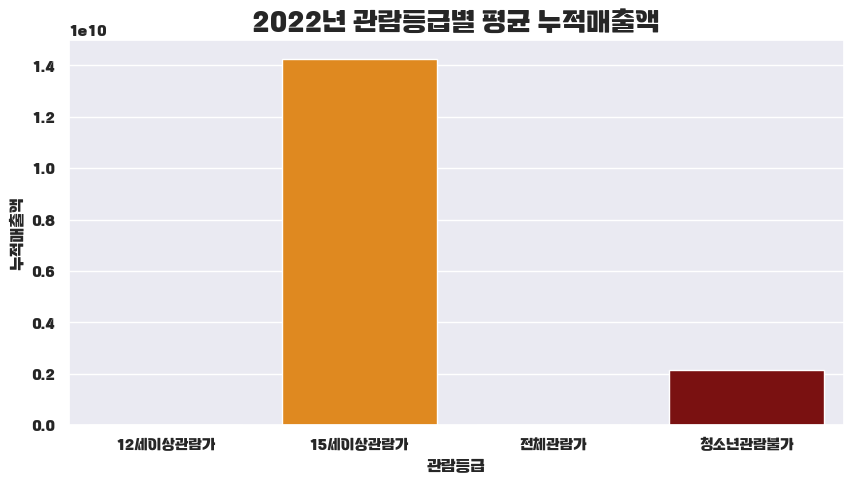

In [307]:
# 2022년 <범죄> 장르에 대한 관람등급에 따른 누적매출액에 대한 평균
drawGraph()
sns.barplot(_cc2022, x='관람등급', y='누적매출액')
plt.title('2022년 관람등급별 평균 누적매출액', size=20)

In [308]:
total = pd.merge(left=_cc2021, right=_cc2022, how='outer', on=None)


Text(0.5, 1.0, '2021-2022 관람등급별 누적매출액')

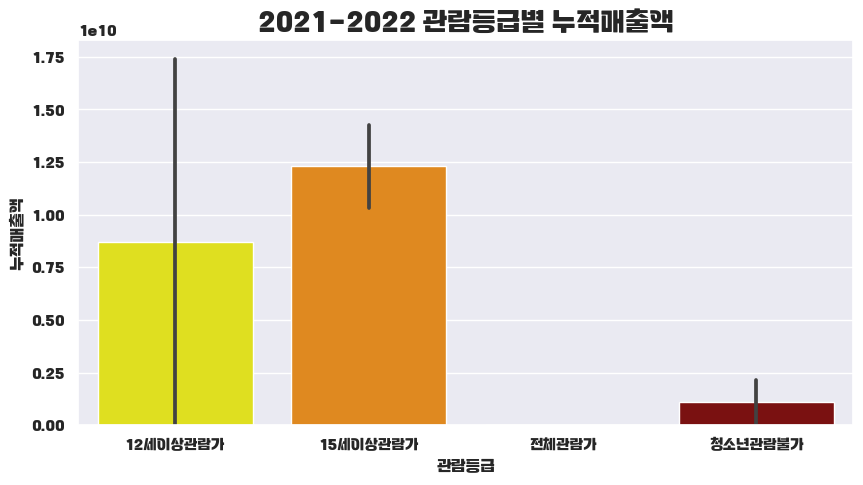

In [309]:
# 2021-2022년 <범죄> 장르에 대한 관람등급에 따른 누적매출액 
drawGraph()
sns.barplot(total, x='관람등급', y='누적매출액')
plt.title('2021-2022 관람등급별 누적매출액', size=20)

---

In [310]:
resultD['newDate'] = pd.to_datetime(resultD['개봉날짜'])
resultD['newDate']

0     2018-08-01
1     2016-12-07
2     2017-12-20
3     2017-08-02
4     2020-08-26
         ...    
772   2022-12-26
773   2022-12-26
774   2022-12-28
775   2023-01-11
776   2023-01-11
Name: newDate, Length: 777, dtype: datetime64[ns]

In [311]:
rc = resultD.copy()
rc["분석월"] = rc["분석월"].astype('string')
rc['분석월'] = rc['분석월'].str[:4] + '-' + rc['분석월'].str[4:6]
rc['분석Date'] = pd.to_datetime(rc['분석월'])
rc.head(1)

,영화명,분석월,점유율,누적매출액,관객수,누적관객수,스크린수,개봉날짜,국적,배급사,...,주제,선정성,폭력성,대사,공포,약물,모방위험,장르,newDate,분석Date
0,신과함께-인과 연,2021-02,490940.0,1.026879e+11,78.0,12277801.0,25.0,2018-08-01,한국,롯데컬처웍스(주)롯데엔터테인먼트,...,12세이상관람가,전체관람가,12세이상관람가,12세이상관람가,12세이상관람가,전체관람가,전체관람가,판타지,2018-08-01,2021-02-01


In [312]:
# '분석월'과 '개봉날짜'의 차이가 1년 이하인 데이터 중 장르가 <범죄>인 데이터 추출
rc['time_delta'] = rc['분석Date'] - rc['newDate']
timeD = abs(rc['time_delta']) / pd.Timedelta('365 days')
mask = timeD <= 1
resRc = rc[mask]
crimeRc = resRc[resRc['장르']=='범죄']
crimeRc.head(2)

# <범죄> 장르에 대한 관람등급별 평균 누적관객수
filt = crimeRc[['관람등급', '누적매출액']].groupby(['관람등급']).mean()
filt.loc['전체관람가'] = 0
filt = filt.reindex(['12세이상관람가', '15세이상관람가', '전체관람가', '청소년관람불가']).reset_index()
filt

,관람등급,누적매출액
0,12세이상관람가,6.994654e+09
1,15세이상관람가,9.580901e+09
2,전체관람가,0.000000e+00
3,청소년관람불가,9.263307e+08


Text(0.5, 1.0, '<범죄> 장르에 대한 관람등급별 평균 누적매출액')

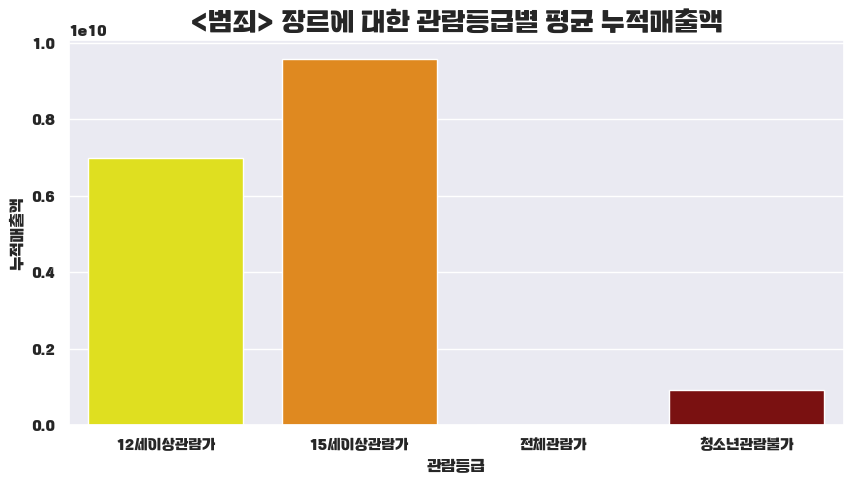

In [313]:
# <범죄> 장르에 대한 관람등급별 평균 누적매출액
drawGraph()
sns.barplot(filt, x='관람등급', y='누적매출액')
plt.title('<범죄> 장르에 대한 관람등급별 평균 누적매출액', size=20)

In [315]:
crimeRD.sort_values(by="누적관객수", ascending=False)

,영화명,분석월,점유율,누적매출액,관객수,누적관객수,스크린수,개봉날짜,국적,배급사,관람등급,상영시간,주제,선정성,폭력성,대사,공포,약물,모방위험,장르
19,범죄도시2,202210,1.761000e+06,1.312970e+11,127.0,12693302.0,1.0,2022-05-18,한국,"주식회사 에이비오엔터테인먼트,플러스엠 엔터테인먼트",15세이상관람가,105분 55초?,15세이상관람가,전체관람가,15세이상관람가,15세이상관람가,15세이상관람가,12세이상관람가,15세이상관람가,범죄
0,독전,202105,3.966000e+06,4.349159e+10,308.0,5064292.0,3.0,2018-05-22,한국,(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,123분 20초,15세이상관람가,15세이상관람가,15세이상관람가,15세이상관람가,15세이상관람가,15세이상관람가,15세이상관람가,범죄
9,조작된 도시,202107,0.000000e+00,2.014547e+10,60.0,2515650.0,1.0,2017-02-09,한국,(주)씨제이이엔엠,15세이상관람가,126분 0초,15세이상관람가,12세이상관람가,15세이상관람가,15세이상관람가,15세이상관람가,12세이상관람가,15세이상관람가,범죄
1,블랙머니,202104,5.760000e+05,2.087231e+10,72.0,2480257.0,1.0,2019-11-13,한국,(주)에이스메이커무비웍스,12세이상관람가,113분 20초,12세이상관람가,전체관람가,12세이상관람가,12세이상관람가,12세이상관람가,12세이상관람가,12세이상관람가,범죄
3,협상,202101,3.200000e+05,1.703245e+10,29.0,1967750.0,1.0,2018-09-19,한국,(주)씨제이이엔엠,15세이상관람가,114분 0초,15세이상관람가,전체관람가,15세이상관람가,15세이상관람가,12세이상관람가,12세이상관람가,15세이상관람가,범죄
18,뺑반,202201,3.740000e+05,1.522587e+10,34.0,1827054.0,1.0,2019-01-30,한국,(주)쇼박스,15세이상관람가,133분 5초,15세이상관람가,전체관람가,15세이상관람가,15세이상관람가,15세이상관람가,12세이상관람가,15세이상관람가,범죄
2,도굴,202102,3.050000e+05,1.396099e+10,38.0,1545281.0,3.0,2020-11-04,한국,(주)씨제이이엔엠,12세이상관람가,114분 50초,12세이상관람가,12세이상관람가,12세이상관람가,12세이상관람가,12세이상관람가,12세이상관람가,12세이상관람가,범죄
16,불한당: 나쁜 놈들의 세상,202205,6.392200e+06,7.768462e+09,579.0,965885.0,2.0,2017-05-17,한국,(주)씨제이이엔엠,청소년관람불가,119분 42초,청소년관람불가,15세이상관람가,청소년관람불가,청소년관람불가,청소년관람불가,15세이상관람가,청소년관람불가,범죄
12,경관의 피,202202,6.531434e+07,6.734233e+09,8232.0,684681.0,93.0,2022-01-05,한국,(주)에이스메이커무비웍스,15세이상관람가,119분 27초,15세이상관람가,12세이상관람가,15세이상관람가,15세이상관람가,15세이상관람가,15세이상관람가,15세이상관람가,범죄
13,특송,202202,1.130595e+08,4.183274e+09,14611.0,444438.0,191.0,2022-01-12,한국,(주)넥스트엔터테인먼트월드(NEW),청소년관람불가,114분 0초,15세이상관람가,전체관람가,청소년관람불가,15세이상관람가,청소년관람불가,12세이상관람가,청소년관람불가,범죄
